Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import glob
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Load Dataset

In [18]:
csv_files = glob.glob("preprocessed_data_csv/part-*.csv")
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print(" Data loaded:", df.shape)
df.head()

X = df.drop("label", axis=1)
y = df["label"]


 Data loaded: (855746, 17)


Split dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("\n Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds, zero_division=0))
print("Recall:", recall_score(y_test, dt_preds, zero_division=0))

try:
    dt_probs = dt_model.predict_proba(X_test)[:, 1]
    print("ROC AUC:", roc_auc_score(y_test, dt_probs))
except Exception as e:
    print("ROC AUC could not be computed:", e)



 Decision Tree Performance:
Accuracy: 0.898305579900672
Precision: 0.12843280849505676
Recall: 0.1510713901152148
ROC AUC: 0.5461250205983424


Random Forest Classifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds, zero_division=0))
print("Recall:", recall_score(y_test, rf_preds, zero_division=0))
try:
    rf_probs = rf_model.predict_proba(X_test)[:, 1]
    print("ROC AUC:", roc_auc_score(y_test, rf_probs))
except Exception as e:
    print("ROC AUC could not be computed:", e)



 Random Forest Performance:
Accuracy: 0.945708442886357
Precision: 0.2222222222222222
Recall: 0.0002153547970281038
ROC AUC: 0.7761960492904838


Naive Bayes

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("\nNaive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Precision:", precision_score(y_test, nb_preds, zero_division=0))
print("Recall:", recall_score(y_test, nb_preds, zero_division=0))
try:
    nb_probs = nb_model.predict_proba(X_test)[:, 1]
    print("ROC AUC:", roc_auc_score(y_test, nb_probs))
except Exception as e:
    print("ROC AUC could not be computed:", e)


Naive Bayes Performance:
Accuracy: 0.9305930470347649
Precision: 0.15930599369085174
Recall: 0.06525250349951545
ROC AUC: 0.6792893196702104


Feedforward Neural Network

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[es], verbose=0)

nn_probs = model.predict(X_test_scaled)
nn_preds = (nn_probs > 0.5).astype("int32")

print("\n Neural Network:")
print("Accuracy:", accuracy_score(y_test, nn_preds))
print("Precision:", precision_score(y_test, nn_preds))
print("Recall:", recall_score(y_test, nn_preds))
print("ROC AUC:", roc_auc_score(y_test, nn_probs))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5349/5349 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step

 Neural Network:
Accuracy: 0.9457376570260005
Precision: 0.0
Recall: 0.0
ROC AUC: 0.7836947759536739


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot Training History

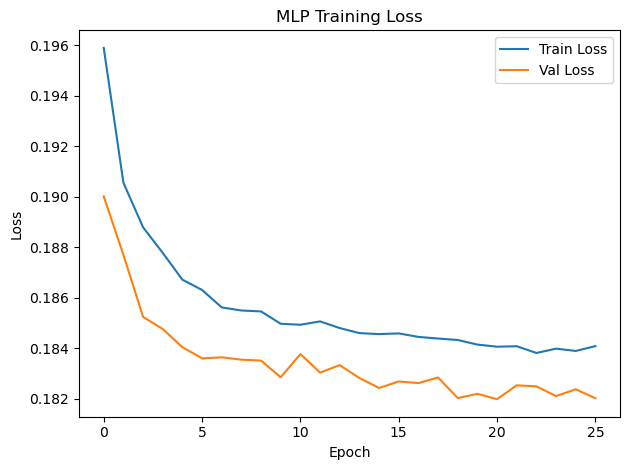

In [32]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()
